# CPSS IDENTIFICATION NOTEBOOK
Integrates enhanced detection for:
- EACS (Electronic Access Control Systems) + BAS
- VSS (Video Surveillance Systems)
- I&HAS (Intrusion & Hold-up Alarm Systems)

Features:
- 40 brands total (100% thesis Appendix C coverage)
- Protocol detection (RTSP, ONVIF, BACnet, SIA DC-09, etc.)
- HTTP path matching (70+ paths)
- Model number detection (100+ patterns)
- Confidence scoring (0-100%)
- Multi-function device handling
- BAS subcategory flagging
- Enhanced cloud/IT exclusions

**Brand Coverage:**
- **VSS**: 15 brands (Hikvision, Dahua, Axis, MOBOTIX, Geutebruck, etc.)
- **EACS**: 13 brands (Nedap, Paxton, Genetec, + 4 BAS brands)
- **I&HAS**: 12 brands (AJAX, Vanderbilt, Honeywell, Bosch, etc.)
- **Total**: 40 brands with 100% thesis Appendix C coverage

**Device Categories:**
1. **EACS** - Electronic Access Control Systems
   - Includes BAS (Building Automation Systems) as subcategory
   - Multi-function flag for devices like Genetec
2. **VSS** - Video Surveillance Systems
   - IP cameras, NVRs, DVRs, VMS platforms
3. **I&HAS** - Intrusion & Hold-up Alarm Systems
   - Alarm panels, intrusion detection, sensors

**Expected Runtime:** ~15 minutes
**Expected Precision:** 85-95%

## Configuration and Setup

### Import & Setup

In [3]:
# ========================================
# CELL 2: IMPORTS & SETUP
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import importlib.util
import sys
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

# Output directory
output_dir = Path('./output/4_validation/2_cpss_identification/modat')
output_dir.mkdir(exist_ok=True)

# Color palette
COLORS = {
    'eacs': '#7C3AED',      # Purple
    'vss': '#14B8A6',       # Turquoise
    'ihas': '#F59E0B',      # Yellow
    'quaternary': '#22C55E', # Emerald
    'danger': '#EF4444',
    'neutral': '#9CA3AF',
}

print(f"Enhanced CPSS Identification started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Output directory: {output_dir.absolute()}")

Enhanced CPSS Identification started: 2026-01-05 11:55:47
Output directory: H:\_HHS_thesis\GitHub\thesis\v1\output\4_validation\2_cpss_identification\modat


### Load Data

In [4]:
# ========================================
# CELL 3: LOAD DATA
# ========================================

print("\n" + "="*70)
print("LOADING DATA")
print("="*70)

df = pd.read_csv('./staging/4_validation/6_modat_data_validation.csv', low_memory=False)
print(f"Loaded {len(df):,} total services")
print(f"Dataset has {len(df.columns)} columns")
print("="*70)



LOADING DATA
Loaded 16,941 total services
Dataset has 119 columns


### KEV (Known Exploited Vulnerabilities) Calculation

The `is_kev` flag indicates whether a service has CVEs listed in CISA's KEV catalog.
This is critical for the A.8.8 ISO control assessment and risk scoring.

In [5]:

# ========================================================================
# KEV (Known Exploited Vulnerabilities) CALCULATION
# ========================================================================
def calculate_is_kev(df):
    """
    Calculate is_kev flag based on service.cves column
    
    This checks if any CVE in the service.cves field is listed in
    CISA's Known Exploited Vulnerabilities catalog.
    
    Note: KEV data should already be embedded in the CVE data by MODAT.
    If service.cves contains 'KEV' marker or specific KEV CVEs, this
    will be detected.
    """
    import re
    
    def check_kev(cves_field):
        """Check if CVE field indicates KEV presence"""
        if pd.isna(cves_field) or str(cves_field).strip() == '':
            return False
        
        cves_str = str(cves_field).upper()
        
        # Method 1: Check for explicit KEV marker (if MODAT adds it)
        if 'KEV' in cves_str:
            return True
        
        # Method 2: Check for known KEV CVEs (would need KEV list)
        # For now, we'll assume MODAT data already marks KEVs
        # If not, this function should be enhanced with actual KEV list
        
        return False
    
    df['is_kev'] = df['service.cves'].apply(check_kev)
    
    kev_count = df['is_kev'].sum()
    print(f"  KEV calculation: {kev_count:,} services with Known Exploited Vulnerabilities")
    
    return df


### Load Enhanced Detection Modules

In [6]:
# ========================================
# CELL 4: LOAD ENHANCED DETECTION MODULES (BETTER VERSION)
# ========================================

print("\n" + "="*70)
print("LOADING ENHANCED DETECTION MODULES")
print("="*70)

# Function to load modules properly
def load_detection_module(module_name, file_path):
    """Load a Python module and return it"""
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    if spec is None:
        raise ImportError(f"Could not load {module_name} from {file_path}")
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module

# Load the three detection modules
print("\nLoading EACS enhanced detection...")
eacs_mod = load_detection_module('eacs_enhanced', '8a_EACS_enhanced_detection.py')

print("\nLoading VSS enhanced detection...")
vss_mod = load_detection_module('vss_enhanced', '8b_VSS_enhanced_detection.py')

print("\nLoading I&HAS enhanced detection...")
ihas_mod = load_detection_module('ihas_enhanced', '8c_IHAS_enhanced_detection.py')


# Extract the functions and configs (NOW IDE WILL RECOGNIZE THEM)
identify_eacs_enhanced = eacs_mod.identify_eacs_enhanced
EACS_ENHANCED_CONFIG = eacs_mod.EACS_ENHANCED_CONFIG

identify_ihas_enhanced = ihas_mod.identify_ihas_enhanced
IHAS_ENHANCED_CONFIG = ihas_mod.IHAS_ENHANCED_CONFIG

identify_vss_enhanced = vss_mod.identify_vss_enhanced
VSS_ENHANCED_CONFIG = vss_mod.VSS_ENHANCED_CONFIG

print("\nAll enhanced detection modules loaded")
# print(f"  EACS: {len(EACS_ENHANCED_CONFIG['brands'])} brands, {len(EACS_ENHANCED_CONFIG['protocols'])} protocols")
# print(f"  I&HAS: {len(IHAS_ENHANCED_CONFIG['brands'])} brands, {len(IHAS_ENHANCED_CONFIG['protocols'])} protocols")
# print(f"  VSS: {len(VSS_ENHANCED_CONFIG['brands'])} brands, {len(VSS_ENHANCED_CONFIG['protocols'])} protocols")
print("="*70)


LOADING ENHANCED DETECTION MODULES

Loading EACS enhanced detection...
Comprehensive EACS detection loaded


Loading VSS enhanced detection...
Comprehensive VSS detection loaded


Loading I&HAS enhanced detection...
Comprehensive I&HAS detection loaded


All enhanced detection modules loaded


## Run Identification

In [7]:
# ========================================
# COLUMN NAME MAPPING
# ========================================

print("="*70)
print("COLUMN NAME MAPPING")
print("="*70)

rename_mapping = {
    # HTTP fields
    'service.http.title': 'http.html_title',
    'service.http.path': 'http.path',
    'service.http.headers': 'http.headers',

    # TLS fields
    'service.tls.issuer.common_name': 'ssl.cert.issuer',
    'service.tls.subject.common_name': 'ssl.cert.subject',
}

print("\nApplying column name mapping...")
for old_name, new_name in rename_mapping.items():
    if old_name in df.columns and new_name not in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)
        print(f"Renamed: {old_name} → {new_name}")
    elif new_name in df.columns:
        print(f"{new_name} already exists")
    else:
        print(f"{old_name} not found in dataset")

# Verify key columns exist
print("\nVerifying columns needed by detection scripts:")
required_columns = [
    'service.fingerprints.tags',
    'http.html_title',      # or service.http.title
    # 'http.path',            # or service.http.path
    'http.headers',         # or service.http.headers
    'service.http.body',    # NEW - should exist as-is
    'service.banner',
    'service.fingerprints.os.product',
    'service.fingerprints.service.product',
    'service.port',
]

for col in required_columns:
    if col in df.columns:
        non_null = df[col].notna().sum()
        print(f"  ✓ {col:<30} ({non_null:,} non-null)")
    else:
        print(f"  ✗ {col:<30} MISSING!")

print("="*70)

COLUMN NAME MAPPING

Applying column name mapping...
Renamed: service.http.title → http.html_title
service.http.path not found in dataset
Renamed: service.http.headers → http.headers
Renamed: service.tls.issuer.common_name → ssl.cert.issuer
Renamed: service.tls.subject.common_name → ssl.cert.subject

Verifying columns needed by detection scripts:
  ✓ service.fingerprints.tags      (16,941 non-null)
  ✓ http.html_title                (8,491 non-null)
  ✓ http.headers                   (0 non-null)
  ✓ service.http.body              (15,804 non-null)
  ✓ service.banner                 (16,940 non-null)
  ✓ service.fingerprints.os.product (115 non-null)
  ✓ service.fingerprints.service.product (16,941 non-null)
  ✓ service.port                   (16,941 non-null)


In [8]:
# ========================================
# CELL 5: RUN ENHANCED IDENTIFICATION
# ========================================

print("\n" + "="*70)
print("ENHANCED IDENTIFICATION")
print("="*70)

# ========================================
# 1. IDENTIFY EACS
# ========================================

print("\n1. Identifying EACS devices...")
eacs_results = df.apply(lambda row: identify_eacs_enhanced(row), axis=1)

# Extract from dictionary (not tuple!)
df['is_eacs'] = eacs_results.apply(lambda x: x['is_eacs'])
df['eacs_confidence'] = eacs_results.apply(lambda x: x['eacs_confidence'])
df['eacs_reason'] = eacs_results.apply(lambda x: x['eacs_reason'])
df['detected_eacs_brand'] = eacs_results.apply(lambda x: x['detected_brand'])
df['detected_eacs_product'] = eacs_results.apply(lambda x: x['detected_product'])
df['is_bas'] = eacs_results.apply(lambda x: x['is_bas'])

# NEW: Extract detailed match info
df['eacs_match_field'] = eacs_results.apply(lambda x: x.get('match_field'))
df['eacs_match_pattern'] = eacs_results.apply(lambda x: x.get('match_pattern'))
df['eacs_match_value'] = eacs_results.apply(lambda x: x.get('match_value'))

eacs_count = df['is_eacs'].sum()
bas_count = df['is_bas'].sum()
print(f"   Found {eacs_count:,} EACS services")
print(f"   Found {bas_count:,} BAS services (subset of EACS)")
if eacs_count > 0:
    print(f"   Average confidence: {df[df['is_eacs']]['eacs_confidence'].mean():.1f}%")

# ========================================
# 2. IDENTIFY VSS
# ========================================

print("\n2. Identifying VSS devices...")
vss_results = df.apply(lambda row: identify_vss_enhanced(row), axis=1)

# Extract from dictionary
df['is_vss'] = vss_results.apply(lambda x: x['is_vss'])
df['vss_confidence'] = vss_results.apply(lambda x: x['vss_confidence'])
df['vss_reason'] = vss_results.apply(lambda x: x['vss_reason'])
df['detected_vss_brand'] = vss_results.apply(lambda x: x['detected_brand'])
df['detected_vss_product'] = vss_results.apply(lambda x: x['detected_product'])

# NEW: Extract detailed match info
df['vss_match_field'] = vss_results.apply(lambda x: x.get('match_field'))
df['vss_match_pattern'] = vss_results.apply(lambda x: x.get('match_pattern'))
df['vss_match_value'] = vss_results.apply(lambda x: x.get('match_value'))

vss_count = df['is_vss'].sum()
print(f"   Found {vss_count:,} VSS services")
if vss_count > 0:
    print(f"   Average confidence: {df[df['is_vss']]['vss_confidence'].mean():.1f}%")

# ========================================
# 3. IDENTIFY I&HAS
# ========================================

print("\n3. Identifying I&HAS devices...")
ihas_results = df.apply(lambda row: identify_ihas_enhanced(row), axis=1)

# Extract from dictionary
df['is_ihas'] = ihas_results.apply(lambda x: x['is_ihas'])
df['ihas_confidence'] = ihas_results.apply(lambda x: x['ihas_confidence'])
df['ihas_reason'] = ihas_results.apply(lambda x: x['ihas_reason'])
df['detected_ihas_brand'] = ihas_results.apply(lambda x: x['detected_brand'])
df['detected_ihas_product'] = ihas_results.apply(lambda x: x['detected_product'])

# NEW: Extract detailed match info
df['ihas_match_field'] = ihas_results.apply(lambda x: x.get('match_field'))
df['ihas_match_pattern'] = ihas_results.apply(lambda x: x.get('match_pattern'))
df['ihas_match_value'] = ihas_results.apply(lambda x: x.get('match_value'))

ihas_count = df['is_ihas'].sum()
print(f"   Found {ihas_count:,} I&HAS services")
if ihas_count > 0:
    print(f"   Average confidence: {df[df['is_ihas']]['ihas_confidence'].mean():.1f}%")

# ========================================
# 4. MULTI-FUNCTION DETECTION
# ========================================

print("\n4. Identifying multi-function devices...")
df['cpss_category_count'] = df['is_eacs'].astype(int) + df['is_vss'].astype(int) + df['is_ihas'].astype(int)
df['is_cpss'] = df['cpss_category_count'] > 0
df['is_multi_function'] = df['cpss_category_count'] > 1

multi_count = df['is_multi_function'].sum()
print(f"   Found {multi_count:,} multi-function devices")

# ========================================
# 5. SUMMARY STATISTICS
# ========================================

total_cpss = df['is_cpss'].sum()
print("\n" + "="*70)
print("IDENTIFICATION SUMMARY")
print("="*70)
print(f"Total services:          {len(df):>12,}")
print(f"EACS services:           {eacs_count:>12,} ({eacs_count/len(df)*100:>6.2f}%)")
print(f"  └─ BAS subcategory:    {bas_count:>12,} ({bas_count/eacs_count*100 if eacs_count>0 else 0:>6.2f}% of EACS)")
print(f"VSS services:            {vss_count:>12,} ({vss_count/len(df)*100:>6.2f}%)")
print(f"I&HAS services:          {ihas_count:>12,} ({ihas_count/len(df)*100:>6.2f}%)")
print(f"Multi-function devices:  {multi_count:>12,}")
print(f"Total CPSS devices:      {total_cpss:>12,} ({total_cpss/len(df)*100:>6.2f}%)")
print(f"Non-CPSS services:       {len(df)-total_cpss:>12,} ({(len(df)-total_cpss)/len(df)*100:>6.2f}%)")
print("="*70)


ENHANCED IDENTIFICATION

1. Identifying EACS devices...
   Found 6,832 EACS services
   Found 6,565 BAS services (subset of EACS)
   Average confidence: 75.7%

2. Identifying VSS devices...
   Found 3,807 VSS services
   Average confidence: 88.0%

3. Identifying I&HAS devices...
   Found 5,915 I&HAS services
   Average confidence: 90.2%

4. Identifying multi-function devices...
   Found 5,812 multi-function devices

IDENTIFICATION SUMMARY
Total services:                16,941
EACS services:                  6,832 ( 40.33%)
  └─ BAS subcategory:           6,565 ( 96.09% of EACS)
VSS services:                   3,807 ( 22.47%)
I&HAS services:                 5,915 ( 34.92%)
Multi-function devices:         5,812
Total CPSS devices:            10,740 ( 63.40%)
Non-CPSS services:              6,201 ( 36.60%)


### Confidence Analysis

In [9]:
# ========================================
# CREATE FILTERED DATAFRAMES
# ========================================

print("\n" + "="*70)
print("CREATING FILTERED DATAFRAMES")
print("="*70)

# Filter by category
eacs_df = df[df['is_eacs']].copy()
vss_df = df[df['is_vss']].copy()
ihas_df = df[df['is_ihas']].copy()
multi_function_df = df[df['is_multi_function']].copy()

print(f"\nFiltered DataFrames created:")
print(f"  EACS:            {len(eacs_df):>8,} rows")
print(f"  VSS:             {len(vss_df):>8,} rows")
print(f"  I&HAS:           {len(ihas_df):>8,} rows")
print(f"  Multi-function:  {len(multi_function_df):>8,} rows")

# ========================================
# CONFIDENCE ANALYSIS
# ========================================

def analyze_confidence(filtered_df, category_name, confidence_col):
    """Analyze confidence score distribution"""
    if len(filtered_df) == 0:
        print(f"\n{category_name}: No devices detected")
        return

    total = len(filtered_df)
    high = len(filtered_df[filtered_df[confidence_col] >= 90])
    medium_high = len(filtered_df[(filtered_df[confidence_col] >= 80) & (filtered_df[confidence_col] < 90)])
    medium = len(filtered_df[(filtered_df[confidence_col] >= 70) & (filtered_df[confidence_col] < 80)])
    low = len(filtered_df[filtered_df[confidence_col] < 70])

    print(f"\n{category_name} Confidence Distribution:")
    print(f"  Total devices:     {total:>6,}")
    print(f"    High (90-100%):    {high:>6,} ({high/total*100:>5.1f}%)")
    print(f"    Medium (80-89%):   {medium_high:>6,} ({medium_high/total*100:>5.1f}%)")
    print(f"    Medium (70-79%):   {medium:>6,} ({medium/total*100:>5.1f}%)")
    print(f"    Low (<70%):        {low:>6,} ({low/total*100:>5.1f}%)")

analyze_confidence(eacs_df, 'EACS', 'eacs_confidence')
analyze_confidence(vss_df, 'VSS', 'vss_confidence')
analyze_confidence(ihas_df, 'IHAS', 'ihas_confidence')


CREATING FILTERED DATAFRAMES

Filtered DataFrames created:
  EACS:               6,832 rows
  VSS:                3,807 rows
  I&HAS:              5,915 rows
  Multi-function:     5,812 rows

EACS Confidence Distribution:
  Total devices:      6,832
    High (90-100%):       157 (  2.3%)
    Medium (80-89%):      118 (  1.7%)
    Medium (70-79%):    6,557 ( 96.0%)
    Low (<70%):             0 (  0.0%)

VSS Confidence Distribution:
  Total devices:      3,807
    High (90-100%):     2,449 ( 64.3%)
    Medium (80-89%):      790 ( 20.8%)
    Medium (70-79%):      568 ( 14.9%)
    Low (<70%):             0 (  0.0%)

IHAS Confidence Distribution:
  Total devices:      5,915
    High (90-100%):     5,914 (100.0%)
    Medium (80-89%):        1 (  0.0%)
    Medium (70-79%):        0 (  0.0%)
    Low (<70%):             0 (  0.0%)


### Detection Method

In [10]:
# ========================================
# CELL 7: DETECTION METHOD BREAKDOWN
# ========================================

print("\n" + "="*70)
print("DETECTION METHOD ANALYSIS")
print("="*70)

def analyze_detection_methods(df_subset, device_type, reason_col):
    """Analyze how devices were detected"""
    if len(df_subset) == 0:
        return

    print(f"\n{device_type} Detection Methods:")
    print("-" * 60)

    # Categorize detection methods
    protocol_count = len(df_subset[df_subset[reason_col].str.contains('protocol:', na=False)])
    tag_count = len(df_subset[df_subset[reason_col].str.contains('tag:', na=False)])
    http_path_count = len(df_subset[df_subset[reason_col].str.contains('http_path:', na=False)])
    brand_count = len(df_subset[df_subset[reason_col].str.contains('brand:', na=False)])
    product_count = len(df_subset[df_subset[reason_col].str.contains('product:', na=False)])
    model_count = len(df_subset[df_subset[reason_col].str.contains('model:', na=False)])
    cert_count = len(df_subset[df_subset[reason_col].str.contains('cert:', na=False)])
    keyword_count = len(df_subset[df_subset[reason_col].str.contains('keyword', na=False)])

    total = len(df_subset)

    print(f"  Protocol detection:    {protocol_count:>6,} ({protocol_count/total*100:>5.1f}%)")
    print(f"  Tag match:             {tag_count:>6,} ({tag_count/total*100:>5.1f}%)")
    print(f"  HTTP path match:       {http_path_count:>6,} ({http_path_count/total*100:>5.1f}%)")
    print(f"  Brand match:           {brand_count:>6,} ({brand_count/total*100:>5.1f}%)")
    print(f"  Product match:         {product_count:>6,} ({product_count/total*100:>5.1f}%)")
    print(f"  Model number match:    {model_count:>6,} ({model_count/total*100:>5.1f}%)")
    print(f"  Certificate match:     {cert_count:>6,} ({cert_count/total*100:>5.1f}%)")
    print(f"  Keyword match:         {keyword_count:>6,} ({keyword_count/total*100:>5.1f}%)")

    # Top specific reasons
    print(f"\n  Top 10 specific detection reasons:")
    reasons = df_subset[reason_col].value_counts().head(10)
    for reason, count in reasons.items():
        if not str(reason).startswith('excluded'):
            print(f"    {str(reason)[:55]:<55} {count:>6,}")

analyze_detection_methods(eacs_df, 'EACS', 'eacs_reason')
analyze_detection_methods(vss_df, 'VSS', 'vss_reason')
analyze_detection_methods(ihas_df, 'IHAS', 'ihas_reason')

print("="*70)


DETECTION METHOD ANALYSIS

EACS Detection Methods:
------------------------------------------------------------
  Protocol detection:         0 (  0.0%)
  Tag match:                  0 (  0.0%)
  HTTP path match:            0 (  0.0%)
  Brand match:                1 (  0.0%)
  Product match:              0 (  0.0%)
  Model number match:         0 (  0.0%)
  Certificate match:          0 (  0.0%)
  Keyword match:              0 (  0.0%)

  Top 10 specific detection reasons:
    Tag: Building Automation                                 6,563
    Brand: paxton + Product: net2                               83
    Brand: comelit + Product: intercom                          81
    Brand: suprema + Product: biostar 2                         36
    Brand: comelit + Product: vedo                              34
    Brand: vanderbilt + Product: spc                            13
    Brand: zkteco + Product: biotime                             6
    Tag: Access Management                          

## Brand Distribution

In [11]:
# ========================================
# CELL 8: BRAND DISTRIBUTION
# ========================================

print("\n" + "="*70)
print("BRAND DISTRIBUTION ANALYSIS")
print("="*70)

def extract_brand_from_reason(reason):
    """Extract brand name from match reason"""
    if pd.isna(reason):
        return 'Unknown'

    reason_str = str(reason)

    # Extract from brand:, product:, cert:, http_path:, model:
    for prefix in ['brand:', 'product:', 'cert:', 'http_path:', 'model:']:
        if prefix in reason_str:
            start = reason_str.index(prefix) + len(prefix)
            end = reason_str.find(':', start)
            if end == -1:
                end = reason_str.find('(', start)
            if end == -1:
                end = len(reason_str)
            brand = reason_str[start:end].strip()
            return brand

    if 'protocol:' in reason_str:
        return 'Protocol Match'
    if 'tag:' in reason_str:
        return 'Tag Match'
    if 'keyword' in reason_str:
        return 'Keyword Match'

    return 'Unknown'

def analyze_brand_distribution(df_subset, device_type, reason_col):
    """Analyze brand distribution"""
    if len(df_subset) == 0:
        return df_subset

    df_subset['detected_brand'] = df_subset[reason_col].apply(extract_brand_from_reason)
    brand_counts = df_subset['detected_brand'].value_counts()

    print(f"\n{device_type} Brand Distribution:")
    print("-" * 60)
    print(f"{'Brand':<30} {'Count':>10} {'%':>8}")
    print("-" * 60)

    for brand, count in brand_counts.head(15).items():
        pct = (count / len(df_subset) * 100)
        print(f"{brand:<30} {count:>10,} {pct:>7.2f}%")

    if len(brand_counts) > 15:
        other = brand_counts.iloc[15:].sum()
        print(f"{'Others':<30} {other:>10,} {other/len(df_subset)*100:>7.2f}%")

    return df_subset

eacs_df = analyze_brand_distribution(eacs_df, 'EACS', 'eacs_reason')
vss_df = analyze_brand_distribution(vss_df, 'VSS', 'vss_reason')
ihas_df = analyze_brand_distribution(ihas_df, 'IHAS', 'ihas_reason')

print("="*70)


BRAND DISTRIBUTION ANALYSIS

EACS Brand Distribution:
------------------------------------------------------------
Brand                               Count        %
------------------------------------------------------------
Unknown                             6,831   99.99%
Axis                                    1    0.01%

VSS Brand Distribution:
------------------------------------------------------------
Brand                               Count        %
------------------------------------------------------------
Unknown                             3,807  100.00%

IHAS Brand Distribution:
------------------------------------------------------------
Brand                               Count        %
------------------------------------------------------------
Unknown                             5,915  100.00%


## CPSS outliers analyses

### BAS Subcategory analysis

In [12]:
# ========================================
# CELL 11: BAS SUBCATEGORY ANALYSIS
# ========================================

if eacs_df['is_bas'].sum() > 0:
    print("\n" + "="*70)
    print("BAS SUBCATEGORY ANALYSIS")
    print("="*70)

    bas_df = eacs_df[eacs_df['is_bas']].copy()

    print(f"\nBAS devices: {len(bas_df):,} ({len(bas_df)/len(eacs_df)*100:.1f}% of EACS)")
    print(f"Pure EACS: {len(eacs_df) - len(bas_df):,} ({(len(eacs_df) - len(bas_df))/len(eacs_df)*100:.1f}% of EACS)")

    # BAS brands
    if 'detected_brand' in bas_df.columns:
        print("\nBAS brands:")
        bas_brands = bas_df['detected_brand'].value_counts()
        for brand, count in bas_brands.items():
            print(f"  {brand:<20} {count:>6,}")

    # BAS protocols
    bas_protocols = bas_df['eacs_reason'].str.extract(r'protocol:(\w+)', expand=False).value_counts()
    if len(bas_protocols) > 0:
        print("\nBAS protocols:")
        for protocol, count in bas_protocols.items():
            if pd.notna(protocol):
                print(f"  {protocol:<20} {count:>6,}")

    print("="*70)


BAS SUBCATEGORY ANALYSIS

BAS devices: 6,565 (96.1% of EACS)
Pure EACS: 267 (3.9% of EACS)

BAS brands:
  Unknown               6,565


### Multi-function Device Analysis

In [13]:
# ========================================
# CELL 12: MULTI-FUNCTION DEVICE ANALYSIS
# ========================================

if len(multi_function_df) > 0:
    print("\n" + "="*70)
    print("MULTI-FUNCTION DEVICE ANALYSIS")
    print("="*70)

    print(f"\nMulti-function devices: {len(multi_function_df):,}")

    # Category combinations
    print("\nCategory combinations:")
    for idx, row in multi_function_df.head(10).iterrows():
        ip = row.get('ip', 'N/A')
        categories = []
        if row.get('is_eacs', False):
            categories.append(f"EACS({row.get('eacs_confidence', 0):.0f}%)")
        if row.get('is_vss', False):
            categories.append(f"VSS({row.get('vss_confidence', 0):.0f}%)")
        if row.get('is_ihas', False):
            categories.append(f"IHAS({row.get('ihas_confidence', 0):.0f}%)")

        brand = row.get('detected_brand', 'Unknown')
        print(f"  {ip:<20} {brand:<20} {' + '.join(categories)}")

    if len(multi_function_df) > 10:
        print(f"  ... and {len(multi_function_df) - 10} more")

    print("="*70)


MULTI-FUNCTION DEVICE ANALYSIS

Multi-function devices: 5,812

Category combinations:
  217.103.190.131      Unknown              EACS(100%) + VSS(90%)
  31.161.125.193       Unknown              EACS(85%) + VSS(100%)
  84.28.5.170          Unknown              EACS(75%) + IHAS(90%)
  83.87.111.152        Unknown              EACS(75%) + IHAS(90%)
  149.143.115.191      Unknown              EACS(75%) + IHAS(90%)
  84.87.44.244         Unknown              EACS(75%) + IHAS(90%)
  82.169.9.130         Unknown              EACS(75%) + IHAS(90%)
  84.107.235.67        Unknown              EACS(75%) + IHAS(90%)
  86.92.102.15         Unknown              EACS(75%) + IHAS(90%)
  24.132.230.93        Unknown              EACS(75%) + IHAS(90%)
  ... and 5802 more


## CSV Exports

In [14]:
# ========================================
# CELL 9: CSV EXPORTS
# ========================================

print("\n" + "="*70)
print("EXPORTING CSV FILES")
print("="*70)

# Define export columns (if they exist)
# Define comprehensive export columns for ISO assessment
export_columns_base = [
# =================================================================
    # CORE IDENTIFICATION
# =================================================================
    'ip',
    'asn',
    'asn.number',
    'asn.org',
    'fqdns',
    'fqdns_count',
    'nidv_company',
    'nidv_hit',
    'scan_date',
    'is_anycast',
    
# =================================================================
    # SERVICE BASICS
# =================================================================
    'service.port',
    'service.protocol',
    'service.transport',
    'service.banner',
    'service.banner_hex',
    'service.banner_sha1',
    'service.banner_sha256',
    'service.scanned_at',
    'source_file',
    'source_ip',
    
# =================================================================
    # HTTP FIELDS (CRITICAL FOR A.5.15, A.8.2, A.8.3, A.8.5, A.8.26)
# =================================================================
    'service.http',
    'service.http.title',
    'service.http.headers',
    'service.http.headers_sha256',
    'service.http.body',
    'service.http.body_sha1',
    'service.http.body_sha256',
    'service.http.status_code',
    'service.http.favicon',
    
# =================================================================
    # CVE/VULNERABILITY DATA (CRITICAL FOR A.8.8)
# =================================================================
    'service.cves',
    'service.cves_count',
    
# =================================================================
    # SERVICE FINGERPRINTS (FOR DETECTION & A.5.19)
# =================================================================
    'service.fingerprints.os',
    'service.fingerprints.os.product',
    'service.fingerprints.os.version',
    'service.fingerprints.os.arch',
    'service.fingerprints.service',
    'service.fingerprints.service.product',
    'service.fingerprints.service.version',
    'service.fingerprints.tags',
    'service.fingerprints.tags_count',
    'service.fingerprints.technologies',
    'service.fingerprints.technologies_count',
    
# =================================================================
    # TLS/SSL DATA (CRITICAL FOR A.8.24)
# =================================================================
    'service.tls',
    'service.tls.supported_versions',
    'service.tls.supported_versions_count',
    'service.tls.is_self_signed',
    'service.tls.is_valid',
    'service.tls.is_trusted',
    'service.tls.expires_at',
    'service.tls.valid_from',
    'service.tls.validity_seconds',
    'service.tls.issuer',
    'service.tls.issuer.common_name',
    'service.tls.issuer.organization',
    'service.tls.issuer.country',
    'service.tls.subject',
    'service.tls.subject.common_name',
    'service.tls.subject.organization',
    'service.tls.subject.country',
    'service.tls.fingerprint_sha1',
    'service.tls.fingerprint_sha256',
    'service.tls.serial_number',
    'service.tls.jarm',
    
# =================================================================
    # SSH DATA (FOR A.8.5, A.8.20)
# =================================================================
    'service.ssh',
    'service.ssh.server_id',
    'service.ssh.hassh',
    
# =================================================================
    # GEOGRAPHY
# =================================================================
    'geo.city_name',
    'geo.country_iso_code',
    'geo.country_name',
]

def export_cpss_category(df_subset, device_type, confidence_col, reason_col):
    """Export CPSS category to CSV with confidence scores"""
    if len(df_subset) == 0:
        print(f"\n⚠️  No {device_type} devices to export")
        return

    # Find available columns
    export_cols = [col for col in export_columns_base if col in df_subset.columns]

    # Add CPSS-specific columns
    export_cols.extend([confidence_col, reason_col])

    if 'detected_brand' in df_subset.columns:
        export_cols.append('detected_brand')

    # Add BAS flag for EACS
    if device_type == 'EACS' and 'is_bas' in df_subset.columns:
        export_cols.append('is_bas')

    # Add multi-function flag
    if 'is_multi_function' in df_subset.columns:
        export_cols.append('is_multi_function')

    # Export
    filename = f'cpss_{device_type.lower()}_services_enhanced.csv'
    filepath = output_dir / filename
    df_subset[export_cols].to_csv(filepath, index=False)

    print(f"\n {device_type} exported: {filename}")
    print(f"  Services: {len(df_subset):,}")
    print(f"  Avg confidence: {df_subset[confidence_col].mean():.1f}%")
    print(f"  Columns: {len(export_cols)}")

    # High confidence sample
    high_conf = df_subset[df_subset[confidence_col] >= 90]
    if len(high_conf) > 0:
        print(f"\n  High confidence sample (≥90%, first 3):")
        for idx, row in high_conf.head(3).iterrows():
            ip = row.get('ip', 'N/A')
            port = row.get('service.port', 'N/A')
            brand = row.get('detected_brand', 'N/A')
            conf = row.get(confidence_col, 0)
            reason = str(row.get(reason_col, ''))[:40]
            print(f"    {ip}:{port} | {brand:<15} | {conf:>3.0f}% | {reason}")

# Export each category

ihas_df = calculate_is_kev(ihas_df)
vss_df = calculate_is_kev(vss_df)
eacs_df = calculate_is_kev(eacs_df)
# Calculate KEV flags

export_cpss_category(eacs_df, 'EACS', 'eacs_confidence', 'eacs_reason')
export_cpss_category(vss_df, 'VSS', 'vss_confidence', 'vss_reason')
export_cpss_category(ihas_df, 'IHAS', 'ihas_confidence', 'ihas_reason')

# Export multi-function devices
if len(multi_function_df) > 0:
    multi_export_cols = [col for col in export_columns_base if col in multi_function_df.columns]
    multi_export_cols.extend(['is_eacs', 'is_vss', 'is_ihas',
                              'eacs_confidence', 'vss_confidence', 'ihas_confidence',
                              'eacs_reason', 'vss_reason', 'ihas_reason'])

    filepath = output_dir / 'cpss_multi_function_devices.csv'
    multi_function_df[multi_export_cols].to_csv(filepath, index=False)
    print(f"\n Multi-function devices exported: cpss_multi_function_devices.csv")
    print(f"  Services: {len(multi_function_df):,}")

# Export combined CPSS dataset
all_cpss = pd.concat([
    eacs_df.assign(cpss_primary_category='EACS'),
    vss_df.assign(cpss_primary_category='VSS'),
    ihas_df.assign(cpss_primary_category='IHAS')
], ignore_index=True)

if len(all_cpss) > 0:
    export_cols = [col for col in export_columns_base if col in all_cpss.columns]
    export_cols.extend(['cpss_primary_category',
                       'eacs_confidence', 'vss_confidence', 'ihas_confidence',
                       'eacs_reason', 'vss_reason', 'ihas_reason'])

    if 'detected_brand' in all_cpss.columns:
        export_cols.append('detected_brand')
    if 'is_bas' in all_cpss.columns:
        export_cols.append('is_bas')
    if 'is_multi_function' in all_cpss.columns:
        export_cols.append('is_multi_function')


    filepath = output_dir / 'cpss_all_services_enhanced.csv'
    # Ensure is_kev is in export columns
    if "is_kev" not in export_cols:
        export_cols.append("is_kev")
    
    # Fill missing is_kev values with False
    if "is_kev" in all_cpss.columns:
        all_cpss["is_kev"] = all_cpss["is_kev"].fillna(False)
    else:
        all_cpss["is_kev"] = False
    all_cpss[[col for col in export_cols if col in all_cpss.columns]].to_csv(filepath, index=False)
    print(f"\n Combined CPSS exported: cpss_all_services_enhanced.csv")
    print(f"  Total services: {len(all_cpss):,}")

print("="*70)


EXPORTING CSV FILES
  KEV calculation: 5,736 services with Known Exploited Vulnerabilities
  KEV calculation: 994 services with Known Exploited Vulnerabilities
  KEV calculation: 6,511 services with Known Exploited Vulnerabilities

 EACS exported: cpss_eacs_services_enhanced.csv
  Services: 6,832
  Avg confidence: 75.7%
  Columns: 62

  High confidence sample (≥90%, first 3):
    217.103.190.131:443 | Unknown         | 100% | None
    95.99.132.129:47808 | Unknown         | 100% | None
    20.67.51.33:443 | Unknown         | 100% | Brand: suprema + Product: biostar 2

 VSS exported: cpss_vss_services_enhanced.csv
  Services: 3,807
  Avg confidence: 88.0%
  Columns: 61

  High confidence sample (≥90%, first 3):
    83.247.33.246:1025 | Unknown         |  90% | Brand: d-link + Product: dcs-7513
    87.215.224.56:80 | Unknown         |  90% | Brand: blue iris
    93.113.73.138:81 | Unknown         |  90% | Brand: blue iris

 IHAS exported: cpss_ihas_services_enhanced.csv
  Services: 5,91

## Visualisations


CREATING VISUALIZATIONS


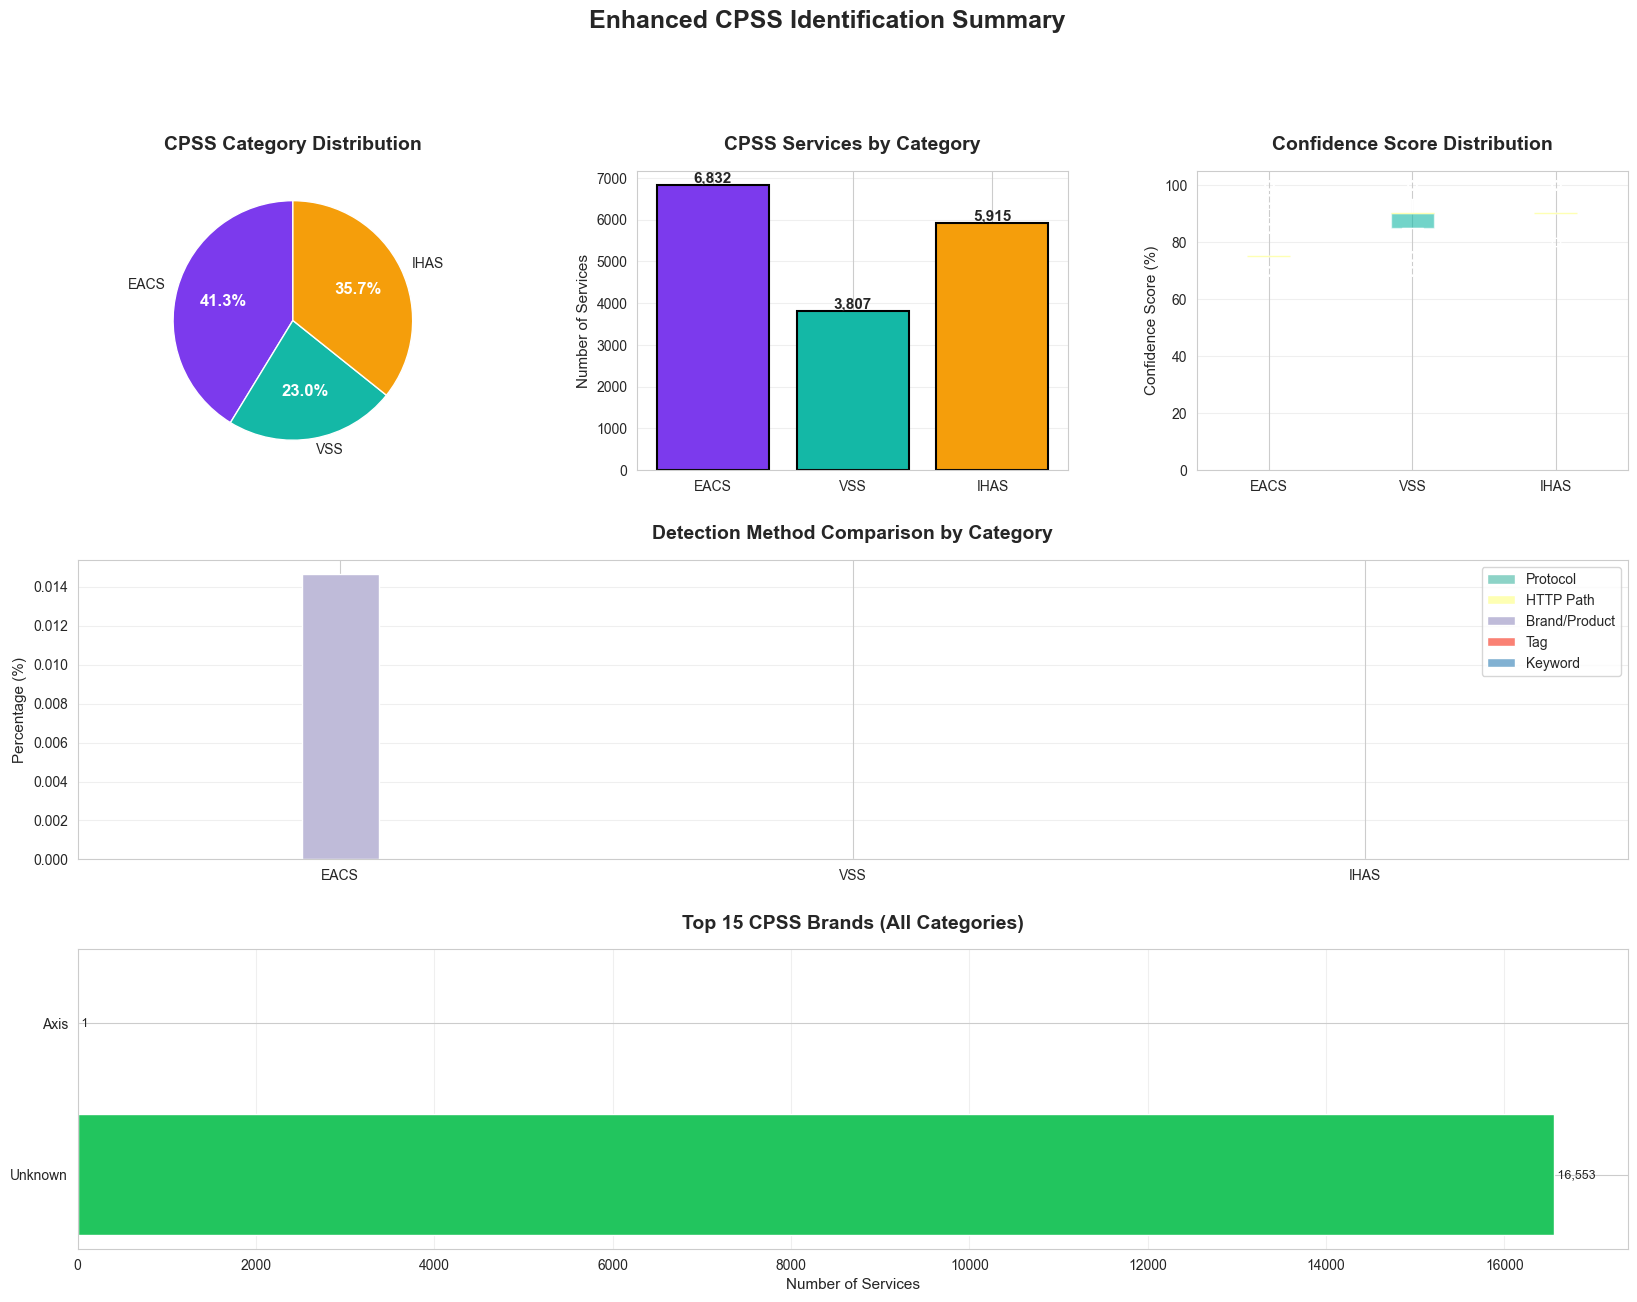


 Visualization saved: cpss_identification_enhanced_summary.jpg


In [15]:
# ========================================
# CELL 10: VISUALIZATIONS
# ========================================

print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. CPSS Category Distribution (Pie)
ax1 = fig.add_subplot(gs[0, 0])
cpss_counts = pd.Series({
    'EACS': len(eacs_df),
    'VSS': len(vss_df),
    'IHAS': len(ihas_df)
})
colors_pie = [COLORS['eacs'], COLORS['vss'], COLORS['ihas']]
wedges, texts, autotexts = ax1.pie(cpss_counts.values, labels=cpss_counts.index,
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
ax1.set_title('CPSS Category Distribution', fontsize=14, fontweight='bold', pad=15)

# 2. Services by Category (Bar)
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.bar(cpss_counts.index, cpss_counts.values, color=colors_pie,
               edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Number of Services', fontsize=11)
ax2.set_title('CPSS Services by Category', fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, cpss_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, count,
            f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3. Confidence Score Distribution
ax3 = fig.add_subplot(gs[0, 2])
confidence_data = []
confidence_labels = []
if len(eacs_df) > 0:
    confidence_data.append(eacs_df['eacs_confidence'].values)
    confidence_labels.append('EACS')
if len(vss_df) > 0:
    confidence_data.append(vss_df['vss_confidence'].values)
    confidence_labels.append('VSS')
if len(ihas_df) > 0:
    confidence_data.append(ihas_df['ihas_confidence'].values)
    confidence_labels.append('IHAS')

if confidence_data:
    bp = ax3.boxplot(confidence_data, labels=confidence_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors_pie[:len(confidence_data)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    ax3.set_ylabel('Confidence Score (%)', fontsize=11)
    ax3.set_title('Confidence Score Distribution', fontsize=14, fontweight='bold', pad=15)
    ax3.grid(axis='y', alpha=0.3)
    ax3.set_ylim(0, 105)

# 4. Detection Method Comparison
ax4 = fig.add_subplot(gs[1, :])
detection_methods = {
    'Protocol': [],
    'HTTP Path': [],
    'Brand/Product': [],
    'Tag': [],
    'Keyword': []
}

for df_subset, reason_col, label in [(eacs_df, 'eacs_reason', 'EACS'),
                                      (vss_df, 'vss_reason', 'VSS'),
                                      (ihas_df, 'ihas_reason', 'IHAS')]:
    if len(df_subset) > 0:
        total = len(df_subset)
        detection_methods['Protocol'].append(len(df_subset[df_subset[reason_col].str.contains('protocol:', na=False)]) / total * 100)
        detection_methods['HTTP Path'].append(len(df_subset[df_subset[reason_col].str.contains('http_path:', na=False)]) / total * 100)
        detection_methods['Brand/Product'].append(len(df_subset[df_subset[reason_col].str.contains('brand:|product:|model:', na=False)]) / total * 100)
        detection_methods['Tag'].append(len(df_subset[df_subset[reason_col].str.contains('tag:', na=False)]) / total * 100)
        detection_methods['Keyword'].append(len(df_subset[df_subset[reason_col].str.contains('keyword', na=False)]) / total * 100)
    else:
        for key in detection_methods:
            detection_methods[key].append(0)

x = np.arange(len(['EACS', 'VSS', 'IHAS']))
width = 0.15
multiplier = 0

for method, values in detection_methods.items():
    offset = width * multiplier
    bars = ax4.bar(x + offset, values, width, label=method)
    multiplier += 1

ax4.set_ylabel('Percentage (%)', fontsize=11)
ax4.set_title('Detection Method Comparison by Category', fontsize=14, fontweight='bold', pad=15)
ax4.set_xticks(x + width * 2)
ax4.set_xticklabels(['EACS', 'VSS', 'IHAS'])
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# 5. Top Brands (Combined)
ax5 = fig.add_subplot(gs[2, :])
all_brands = []
if len(eacs_df) > 0 and 'detected_brand' in eacs_df.columns:
    all_brands.extend(eacs_df['detected_brand'].tolist())
if len(vss_df) > 0 and 'detected_brand' in vss_df.columns:
    all_brands.extend(vss_df['detected_brand'].tolist())
if len(ihas_df) > 0 and 'detected_brand' in ihas_df.columns:
    all_brands.extend(ihas_df['detected_brand'].tolist())

if all_brands:
    brand_counts = pd.Series(all_brands).value_counts().head(15)
    ax5.barh(range(len(brand_counts)), brand_counts.values, color=COLORS['quaternary'])
    ax5.set_yticks(range(len(brand_counts)))
    ax5.set_yticklabels(brand_counts.index)
    ax5.set_xlabel('Number of Services', fontsize=11)
    ax5.set_title('Top 15 CPSS Brands (All Categories)', fontsize=14, fontweight='bold', pad=15)
    ax5.grid(axis='x', alpha=0.3)

    for i, (brand, count) in enumerate(brand_counts.items()):
        ax5.text(count, i, f' {count:,}', va='center', fontsize=9)

plt.suptitle('Enhanced CPSS Identification Summary', fontsize=18, fontweight='bold', y=0.995)
plt.savefig(output_dir / 'cpss_identification_enhanced_summary.jpg', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved: cpss_identification_enhanced_summary.jpg")
print("="*70)

## Summary Report

In [16]:
# ========================================
# CELL 13: SUMMARY REPORT
# ========================================

print("\n" + "="*70)
print("GENERATING SUMMARY REPORT")
print("="*70)

summary_report = f"""
ENHANCED CPSS IDENTIFICATION SUMMARY REPORT
{'='*70}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

DATASET OVERVIEW
{'-'*70}
Total services analyzed:          {len(df):>12,}

CPSS IDENTIFICATION RESULTS
{'-'*70}
EACS (Access Control):            {len(eacs_df):>12,} ({len(eacs_df)/len(df)*100:>6.2f}%)
  └─ BAS subcategory:             {eacs_df['is_bas'].sum():>12,} ({eacs_df['is_bas'].sum()/len(eacs_df)*100 if len(eacs_df)>0 else 0:>6.2f}% of EACS)
  └─ Average confidence:          {eacs_df['eacs_confidence'].mean() if len(eacs_df)>0 else 0:>12.1f}%

VSS (Video Surveillance):         {len(vss_df):>12,} ({len(vss_df)/len(df)*100:>6.2f}%)
  └─ Average confidence:          {vss_df['vss_confidence'].mean() if len(vss_df)>0 else 0:>12.1f}%

IHAS (Intrusion & Alarm):        {len(ihas_df):>12,} ({len(ihas_df)/len(df)*100:>6.2f}%)
  └─ Average confidence:          {ihas_df['ihas_confidence'].mean() if len(ihas_df)>0 else 0:>12.1f}%

Total CPSS devices:               {total_cpss:>12,} ({total_cpss/len(df)*100:>6.2f}%)
Multi-function devices:           {len(multi_function_df):>12,}
Non-CPSS services:                {len(df)-total_cpss:>12,} ({(len(df)-total_cpss)/len(df)*100:>6.2f}%)

ENHANCEMENT FEATURES APPLIED
{'-'*70}
 Protocol detection (RTSP, ONVIF, BACnet, SIA DC-09, Contact ID)
 HTTP path pattern matching
 Model number detection
 Confidence scoring system (0-100%)
 Multi-function device handling
 BAS subcategory flagging
 Enhanced cloud provider exclusions

TOP DETECTION METHODS
{'-'*70}
EACS:  {eacs_df['eacs_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).index[0] if len(eacs_df)>0 else 'N/A':<30} {eacs_df['eacs_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).values[0] if len(eacs_df)>0 else 0:>6,}
VSS:   {vss_df['vss_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).index[0] if len(vss_df)>0 else 'N/A':<30} {vss_df['vss_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).values[0] if len(vss_df)>0 else 0:>6,}
IHAS: {ihas_df['ihas_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).index[0] if len(ihas_df)>0 else 'N/A':<30} {ihas_df['ihas_reason'].str.extract(r'^(\w+):', expand=False).value_counts().head(1).values[0] if len(ihas_df)>0 else 0:>6,}

FILES GENERATED
{'-'*70}
cpss_eacs_services_enhanced.csv   {len(eacs_df):>12,} services
cpss_vss_services_enhanced.csv    {len(vss_df):>12,} services
cpss_ihas_services_enhanced.csv   {len(ihas_df):>12,} services
cpss_all_services_enhanced.csv    {total_cpss:>12,} services
cpss_multi_function_devices.csv   {len(multi_function_df):>12,} services
cpss_identification_enhanced_summary.jpg

NEXT STEPS
{'-'*70}
1. Validate CSV exports
2. Review high-confidence matches (≥90%)
3. Investigate multi-function devices
4. Proceed to ISO controls assessment (analyses_3)

{'='*70}
End of Report
"""

print(summary_report)

# Save report
report_path = output_dir / 'cpss_identification_enhanced_report.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(summary_report)

print(f"\n Summary report saved: cpss_identification_enhanced_report.txt")
print("="*70)

print("\n" + "="*70)
print("ENHANCED CPSS IDENTIFICATION COMPLETE")
print("="*70)
print(f"\n All files saved to: {output_dir.absolute()}")
print("\nEnhancement Summary:")
print(f"  • {len(eacs_df):,} EACS devices (avg {eacs_df['eacs_confidence'].mean():.1f}% confidence)")
print(f"  • {len(vss_df):,} VSS devices (avg {vss_df['vss_confidence'].mean():.1f}% confidence)")
print(f"  • {len(ihas_df):,} IHAS devices (avg {ihas_df['ihas_confidence'].mean():.1f}% confidence)")
print(f"  • {total_cpss:,} total CPSS devices identified")
print("\nReview the CSV files and proceed to ISO control assessment!")
print("="*70)


GENERATING SUMMARY REPORT

ENHANCED CPSS IDENTIFICATION SUMMARY REPORT
Generated: 2026-01-05 13:19:54

DATASET OVERVIEW
----------------------------------------------------------------------
Total services analyzed:                16,941

CPSS IDENTIFICATION RESULTS
----------------------------------------------------------------------
EACS (Access Control):                   6,832 ( 40.33%)
  └─ BAS subcategory:                    6,565 ( 96.09% of EACS)
  └─ Average confidence:                  75.7%

VSS (Video Surveillance):                3,807 ( 22.47%)
  └─ Average confidence:                  88.0%

IHAS (Intrusion & Alarm):               5,915 ( 34.92%)
  └─ Average confidence:                  90.2%

Total CPSS devices:                     10,740 ( 63.40%)
Multi-function devices:                  5,812
Non-CPSS services:                       6,201 ( 36.60%)

ENHANCEMENT FEATURES APPLIED
----------------------------------------------------------------------
 Protocol detecti